# Análise Exploratória de Dados 
## | Prevendo Evasão e o Sucesso Acadêmico de Aunos do Ensino Superior

### > **Objetivo do Notebook**: 

Explorar o conjunto de dados para entender suas principais características, identificar padrões, outliers e preparar insights iniciais para modelagem.

### > **Fonte do Dados**: 

O dataset presente nos arquivos do projeto foi extraído da competição do Kaggle <a href="https://www.kaggle.com/competitions/playground-series-s4e6/data">Classification with an Academic Success Dataset</a>  gerado a partir de um modelo de aprendizagem profunda treinado no conjunto de dados <a href="https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success">Predict Students' Dropout and Academic Success</a>. As distribuições de *features* são próximas, mas não exatamente iguais, aos do original.

### > **Problemática do Projeto**:

No Brasil no ano de 2024, dados do Mapa do Ensino Superior organizado pelo <a href="https://www.semesp.org.br/instituto/home/">Instituto Semesp</a>, apontam que cerca de **57% dos estudantes** [1] que ingressam em cursos superiores acabam abandonando seus estudos antes da conclusão. Essa taxa inclui tanto instituições públicas quanto privadas e abrange modalidades presenciais e a distância. 

Em números absolutos, a evasão é expressiva, com estimativas indicando que quase **3,5 milhões de alunos deixaram o ensino superior** [2] em 2021 apenas nas instituições privadas, tornando o abandono um dos grandes desafios do setor educacional brasileiro. O fenômeno se agrava em modalidades como o ensino a distância (EaD), que teve uma taxa de evasão de **36,6%**, próxima ao ensino presencial [1].

O projeto em questão propõe desenvolver um modelo preditivo que, com base em dados históricos e padrões identificados, possa prever quais alunos estão em risco de evasão. Esse sistema visa oferecer às instituições de ensino superior uma ferramenta para identificar estudantes com alta propensão ao abandono, possibilitando intervenções precoces e personalizadas que contribuam para a redução das taxas de evasão. Ao apoiar as universidades na aplicação de estratégias direcionadas de retenção, o modelo busca criar um impacto positivo e duradouro na educação superior brasileira.

Fonte: <a href="https://www.correiobraziliense.com.br/euestudante/ensino-superior/2024/05/6852929-ensino-superior-no-brasil-tem-57-de-evasao-na-rede-publica-e-privada.html">[1]</a>, <a href="https://g1.globo.com/educacao/noticia/2022/01/02/quase-35-milhoes-de-alunos-evadiram-de-universidades-privadas-no-brasil-em-2021.ghtml">[2]</a>

<a name="índice"></a>
# | Índice

1. [Preparação dos Dados](#preparacao)
   - 1.1 [Importando Bibliotecas](#bibliotecas)
   - 1.2 [Carregando Dados](#dados)
2. [Exploração e Tratamento dos Dados](#exploracao)
   - 2.1 [Dicionário](#dicionário)
   - 2.2 [Tratamento dos Dados](#tratamento)
   - 2.3 [Características dos Dados](#características)
   - 2.4 [Correlação & Entropia](#corr)

<a name="preparacao"></a>
# | Preparação dos Dados

Como primeira etapa do nosso trabalho, vamos começar importando as **bibliotecas** necessárias para a preparação dos dados à modelagem.

<a name="bibliotecas"></a>
## | Importando Bibliotecas

Nesse notebook, vamos utilizar **pandas** para manipulação dos dados e **seaborn** e **matplotlib** para visualização dos mesmos.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from ydata_profiling import ProfileReport

<a name="dados"></a>
## | Carregando Dados

Agora vamos extrair os dados do diretório *data* do projeto e visualizar sua estrutura.

In [2]:
dados = pd.read_csv('../data/raw/train.csv')
dados.head(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


<a name="exploracao"></a>
# | Exploração dos Dados

Antes de iniciarmos a nossa exploração dos dados, vamos observar abaixo o **dicionário dos dados** que nos ajudará a identificar as **classes** de cada coluna categórica presente no dataset. As classes estão representadas por números no dataset e estão separadas por barras no dicionário abaixo.

<a name="dicionário"></a>
## | Dicionário de Dados
| Nome da Variável | Tradução | Papel | Tipo | Descrição |
| ---------------- | -------- | ----- |----- | --------- |
| Marital Status | Estado Civil | Feature | Integer | 1 - solteiro / 2 - casado / 3 - viúvo / 4 - divorciado / 5 - união estável / 6 - legalmente separado |
| Application mode | Forma de Aplicação | Feature | Integer | 1 – 1ª fase – contingente geral   / 2 – Portaria nº 612/93 / 5 - 1ª fase - contingente especial (Ilha dos Açores) / 7 - Titulares de outros cursos superiores / 10 - Portaria nº 854-B/99 / 15 - Estudante internacional (bacharelado) / 16 – 1ª fase – contingente especial (Ilha da Madeira) / 17 – 2ª fase – contingente geral / 18 – 3ª fase – contingente geral / 26 - Portaria n.º 533-A/99, alínea b2) (Plano Diferente) / 27 - Portaria nº 533-A/99, item b3 (Outra Instituição) / 39 - Maiores de 23 anos / 42 - Transferência / 43 – Mudança de curso / 44 - Titulares de diploma de especialização tecnológica / 51 - Mudança de instituição/curso / 53 - Titulares de diplomas de ciclo curto / 57 - Mudança de instituição/curso (Internacional)
| Application order | Ordem de Aplicação | Feature | Integer | Ordem de aplicação (entre 0 - primeira escolha; e 9 última escolha)
| Course | Curso | Feature | Integer | 33 - Tecnologias de Produção de Biocombustíveis / 171 - Animação e Design Multimédia / 8014 - Serviço Social (atendimento noturno) / 9003 - Agronomia / 9070 - Design de Comunicação / 9085 - Enfermagem Veterinária / 9119 - Engenharia Informática / 9130 - Equinicultura / 9147 - Gestão / 9238 - Serviço Social / 9254 - Turismo / 9500 - Enfermagem / 9556 - Higiene Oral / 9670 - Gestão de Publicidade e Marketing / 9773 - Jornalismo e Comunicação / 9853 - Ensino Básico / 9991 - Gestão (atendimento noturno) 
| Daytime/evening attendance | Atendimento diurno/noturno | Feature | Integer | 1 - diurno / 0 - noturno |
| Previous qualification | Qualificação Anterior | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Previous qualification (grade) | Nota da Qualificação Anterior | Feature | Integer | Nota da qualificação anterior (entre 0 e 200) |
| Nacionality | Nacionalidade | Feature | Integer | 1 - Português / 2 - Alemão / 6 - Espanhol / 11 - Italiano / 13 - Holandês / 14 - Inglês / 17 - Lituano / 21 - Angolano / 22 – Cabo-verdiano / 24 - Guineense / 25 – Moçambicano /26 - Santomense / 32 - Turco / 41 - brasileiro / 62 - romeno / 100 - Moldávia (República da) / 101 - Mexicano / 103 - Ucraniano / 105 - Russo / 108 - Cubano / 109 - Colombiano |
| Mother's qualification | Qualificação da Mãe | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Father's qualification | Qualificação do Pai | Feature | Integer | 1 - Ensino Secundário - 12.º Ano de Escolaridade ou Eq. / 2 – Ensino Superior – Bacharelado / 3 – Ensino Superior – Licenciatura / 4 – Ensino Superior – Mestrado / 5 – Ensino Superior – Doutorado / 6 - Frequência do Ensino Superior / 9 - 12º Ano de Escolaridade - Não Concluído / 10 - 11º Ano de Escolaridade - Não Concluído / 11 - 7º ano (antigo) / 12 - Outros - 11º Ano de Escolaridade  / 13 - 2º ano do ensino médio complementar / 14 - 10º Ano de Escolaridade / 18 – Curso de comércio geral / 19 - Ensino Básico 3.º Ciclo (9.º/10.º/11.º Ano) ou Equiv. / 20 - Curso Complementar de Ensino Médio / 22 – Curso técnico-profissional / 25 – Curso Complementar de Ensino Médio – não concluído / 26 - 7º ano de escolaridade / 27 - 2.º ciclo do curso secundário geral / 29 - 9º Ano de Escolaridade - Não Concluído / 30 - 8º ano de escolaridade / 31 - Curso Geral de Administração e Comércio / 33 - Contabilidade e Administração Complementares / 34 - Desconhecido / 35 – Não sabe ler nem escrever / 36 - Consegue ler sem ter o 4º ano de escolaridade / 37 - Ensino básico 1.º ciclo (4.º/5.º ano) ou equiv. / 38 - Ensino Básico 2.º Ciclo (6.º/7.º/8.º Ano) ou Equiv. / 39 – Curso de especialização tecnológica / 40 - Ensino superior – licenciatura (1.º ciclo) / 41 - Curso superior especializado / 42 – Curso técnico superior profissional / 43 - Ensino Superior - Mestrado (2.º ciclo) / 44 - Ensino Superior - Doutoramento (3.º ciclo) |
| Mother's occupation | Ocupação da Mãe | Feature | Integer | 0 - Estudante / 1 - Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos / 2 - Especialistas em Atividades Intelectuais e Científicas / 3 - Técnicos e Profissões de Nível Intermediário / 4 - Pessoal Administrativo / 5 - Trabalhadores de Serviços Pessoais, Segurança e Proteção e Vendedores / 6 - Agricultores e Trabalhadores Qualificados na Agricultura, Pesca e Silvicultura / 7 - Trabalhadores Qualificados na Indústria, Construção e Artesãos / 8 - Operadores de Instalação e Máquinas e Trabalhadores de Montagem / 9 - Trabalhadores Não Qualificados / 10 - Profissões das Forças Armadas / 90 - Outra Situação / 99 - (em branco) / 101 - Oficiais das Forças Armadas / 102 - Sargentos das Forças Armadas / 103 - Outros funcionários das Forças Armadas / 112 - Diretores de serviços administrativos e comerciais / 114 - Diretores de hotéis, restaurantes, comércio e outros serviços / 121 - Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas / 122 - Profissionais de saúde / 123 - Professores / 124 - Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais / 125 - Especialistas em tecnologias de informação e comunicação (TIC) / 131 - Técnicos e profissões de nível intermediário em ciências e engenharia / 132 - Técnicos e profissionais de nível intermediário em saúde / 134 - Técnicos de nível intermediário em serviços jurídicos, sociais, esportivos, culturais e similares / 135 - Tecnologia da informação e comunicação / 141 - Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados / 143 - Operadores de dados, contabilidade, estatística, serviços financeiros e relacionados a registros / 144 - Outro pessoal de apoio administrativo / 151 - Trabalhadores de serviços pessoais / 152 - Vendedores / 153 - Trabalhadores de cuidados pessoais e similares / 154 - Pessoal de serviços de proteção e segurança / 161 - Agricultores orientados para o mercado e trabalhadores qualificados em produção agrícola e animal / 163 - Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência / 171 - Trabalhadores qualificados da construção civil e similares, exceto eletricistas / 172 - Trabalhadores qualificados em metalurgia, metalurgia e similares / 173 - Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares / 174 - Trabalhadores qualificados em eletricidade e eletrônica / 175 - Trabalhadores em processamento de alimentos, marcenaria, vestuário e outras indústrias e ofícios / 181 - Operadores de máquinas e instalações fixas / 182 - Trabalhadores de montagem / 183 - Motoristas de veículos e operadores de equipamentos móveis / 191 - Trabalhadores de limpeza / 192 - Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura / 193 - Trabalhadores não qualificados na indústria extrativa, construção, manufatura e transporte / 194 - Assistentes de preparação de refeições / 195 - Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes |
| Father's occupation | Ocupação do Pai | Feature | Integer | 0 - Estudante / 1 - Representantes do Poder Legislativo e dos Órgãos Executivos, Diretores, Diretores e Gerentes Executivos / 2 - Especialistas em Atividades Intelectuais e Científicas / 3 - Técnicos e Profissões de Nível Intermediário / 4 - Pessoal Administrativo / 5 - Trabalhadores de Serviços Pessoais, Segurança e Proteção e Vendedores / 6 - Agricultores e Trabalhadores Qualificados na Agricultura, Pesca e Silvicultura / 7 - Trabalhadores Qualificados na Indústria, Construção e Artesãos / 8 - Operadores de Instalação e Máquinas e Trabalhadores de Montagem / 9 - Trabalhadores Não Qualificados / 10 - Profissões das Forças Armadas / 90 - Outra Situação / 99 - (em branco) / 101 - Oficiais das Forças Armadas / 102 - Sargentos das Forças Armadas / 103 - Outros funcionários das Forças Armadas / 112 - Diretores de serviços administrativos e comerciais / 114 - Diretores de hotéis, restaurantes, comércio e outros serviços / 121 - Especialistas em ciências físicas, matemática, engenharia e técnicas relacionadas / 122 - Profissionais de saúde / 123 - Professores / 124 - Especialistas em finanças, contabilidade, organização administrativa, relações públicas e comerciais / 125 - Especialistas em tecnologias de informação e comunicação (TIC) / 131 - Técnicos e profissões de nível intermediário em ciências e engenharia / 132 - Técnicos e profissionais de nível intermediário em saúde / 134 - Técnicos de nível intermediário em serviços jurídicos, sociais, esportivos, culturais e similares / 135 - Tecnologia da informação e comunicação / 141 - Trabalhadores de escritório, secretárias em geral e operadores de processamento de dados / 143 - Operadores de dados, contabilidade, estatística, serviços financeiros e relacionados a registros / 144 - Outro pessoal de apoio administrativo / 151 - Trabalhadores de serviços pessoais / 152 - Vendedores / 153 - Trabalhadores de cuidados pessoais e similares / 154 - Pessoal de serviços de proteção e segurança / 161 - Agricultores orientados para o mercado e trabalhadores qualificados em produção agrícola e animal / 163 - Agricultores, criadores de gado, pescadores, caçadores e coletores, subsistência / 171 - Trabalhadores qualificados da construção civil e similares, exceto eletricistas / 172 - Trabalhadores qualificados em metalurgia, metalurgia e similares / 173 - Trabalhadores qualificados em impressão, fabricação de instrumentos de precisão, joalheiros, artesãos e similares / 174 - Trabalhadores qualificados em eletricidade e eletrônica / 175 - Trabalhadores em processamento de alimentos, marcenaria, vestuário e outras indústrias e ofícios / 181 - Operadores de máquinas e instalações fixas / 182 - Trabalhadores de montagem / 183 - Motoristas de veículos e operadores de equipamentos móveis / 191 - Trabalhadores de limpeza / 192 - Trabalhadores não qualificados na agricultura, produção animal, pesca e silvicultura / 193 - Trabalhadores não qualificados na indústria extrativa, construção, manufatura e transporte / 194 - Assistentes de preparação de refeições / 195 - Vendedores ambulantes (exceto alimentos) e prestadores de serviços ambulantes |
| Admission grade | Nota de Admissão | Feature | Float | Nota de admissão (entre 0 e 200) | 
| Displaced | Deslocado | Feature | Integer | 1 - sim / 0 - não |
| Educational special needs | Necessidadss Educacionais Especiais | Feature | Integer | 1 - sim / 0 - não |
| Debtor | Devedor | Feature | Integer | 1 - sim / 0 - não |
| Tuition fees up to date | Mensalidades em Dia | Feature | Integer | 1 - sim / 0 - não |
| Gender | Gênero | Feature | Integer | 1 - masculino / 0 - feminino |
| Scholarship holder | Bolsista | Feature | Integer | 1 - sim / 0 - não |
| Age at enrollment | Idade na Matrícula | Feature | Integer | Idade do aluno na matrícula |
| International | Estudante Internacional | Feature | Integer | 1 - sim / 0 - não |
| Curricular units 1st sem (credited) | Unidades curriculares 1º semestre (creditadas) | Feature | Integer | Número de unidades curriculares creditadas no 1.º semestre |
| Curricular units 1st sem (enrolled) | Unidades curriculares 1º semestre (inscritos) | Feature | Integer | Número de unidades curriculares inscritas no 1.º semestre |
| Curricular units 1st sem (evaluations) | Unidades curriculares 1º semestre (avaliações) | Feature | Integer |  Número de avaliações a unidades curriculares no 1.º semestre ||
| Curricular units 1st sem (approved) | Unidades curriculares 1º semestre (aprovado) | Feature | Integer | Número de unidades curriculares aprovadas no 1.º semestre |
| Curricular units 1st sem (grade) | Unidades curriculares 1º semestre (nota) | Feature | Float | Média de notas do 1.º semestre (entre 0   20 | 
| Curricular units 1st sem (without evaluations) | Unidades curriculares 1º semestre (sem avaliações) | Feature | Integer | Número de unidades curriculares sem avaliações no 1.º semestre |
| Curricular units 2nd sem (credited) | Unidades curriculares 2º semestre (creditadas) | Feature | Integer | Número de unidades curriculares creditadas no 2.º semestre |
| Curricular units 2nd sem (enrolled) | Unidades curriculares 2º semestre (inscritos) | Feature | Integer | Número de unidades curriculares inscritas no 2.º semestre 
| Curricular units 2nd sem (evaluations) | Unidades curriculares 2º semestre (avaliações) | Feature | Integer | Número de avaliações a unidades curriculares no 2.º semestre |
|  Curricular units 2nd sem (approved) | Unidades curriculares 2º semestre (aprovado) | Feature | Integer | Número de unidades curriculares aprovadas no 2.º semestre |
| Curricular units 2nd sem (grade) | Unidades curriculares 2º semestre (nota) | Feature | Float | Média de notas do 2.º semestre (entre 0 e 20| 
| Curricular units 2nd sem (without evaluations) | Unidades curriculares 2º semestre (sem avaliações) | Feature | Integer | Número de unidades curriculares sem avaliações no 2.º semestre |
| Unemployment rate | Taxa de Desemprego | Feature | Float | Taxa de Desemprego (%) |
| Inflation rate | Taxa de Inflação | Feature | Float | Taxa de Inflação (%) |
| GDP | PIB | Feature | Float | PIB |
| Target | Variável-alvo | Target | Object |Três categorias (abandono, matriculado e graduado) que descrevem a situação do aluno ao final da duração normal do curso |s

### | Classes Não Identificadas

Durante a preparação deste notebook, foram identificadas inconsistências no dicionário acima em comparação com a base de dados. Especificamente, foram encontradas classes de determinadas variáveis categóricas que não possuem correspondência no dicionário de dados, sendo portanto, consideradas **classes não identificadas**. Como o foco deste projeto é o desenvolvimento de um modelo de classificação, não iremos nos aprofundar nas causas dessas discrepâncias. Em vez disso, optaremos por avaliar a frequência dessas classes dentro de suas respectivas variáveis. Caso a frequência seja inferior a 0.1% que é o nosso fator de relevância, essas classes serão descartadas da base de dados para que possamos prosseguir com a modelagem de forma consistente. Abaixo estão listadas as variáveis afetadas e suas respectivas classes não identificadas:

**Application mode**: 3, 4, 35, 9 e 12

**Course**: 979 e 39

**Previous qualification**: 17 e 15

**Mother's qualification**: 8, 15, 28 e 7

**Father's qualification**: 7, 15, 21, 23 e 24

**Mother's occupation**: 11, 38 e 127

**Father's occupation**: 96, 39, 11, 12, 13, 19, 148 e 22

In [3]:
# Mapeia variáveis com suas respectivas classes não identificadas
vars = {"Application mode": [3, 4, 35, 9, 12], 
        "Course": [979, 39], 
        "Previous qualification": [17, 15], 
        "Mother's qualification": [8, 15, 28, 7], 
        "Father's qualification": [7, 15, 21, 23, 24], 
        "Mother's occupation": [11, 38, 127], 
        "Father's occupation": [96, 39, 11, 12, 13, 19, 148, 22]}

# Mapeia variáveis com suas respectivas contagem de classes
contador_classes_por_var = {col: dados[col].value_counts() for col in vars.keys()}

# Visualiza a frequência das classes não identificadas de cada variável selecionada
for var, indices in vars.items():
    print(f'Para a variável {var}')
    contador_classes = contador_classes_por_var[var]
    total = contador_classes.sum()
    classes_selecionadas = contador_classes[contador_classes.index.isin(indices)]
    for index, contagem in enumerate(classes_selecionadas):
        print(indices[index], end=' - ')
        print(f'{(contagem / total) * 100:.3f} %')
    print()

Para a variável Application mode
3 - 0.001 %
4 - 0.001 %
35 - 0.001 %
9 - 0.001 %
12 - 0.001 %

Para a variável Course
979 - 0.001 %
39 - 0.001 %

Para a variável Previous qualification
17 - 0.014 %
15 - 0.003 %

Para a variável Mother's qualification
8 - 0.001 %
15 - 0.001 %
28 - 0.001 %
7 - 0.001 %

Para a variável Father's qualification
7 - 0.003 %
15 - 0.001 %
21 - 0.001 %
23 - 0.001 %
24 - 0.001 %

Para a variável Mother's occupation
11 - 0.001 %
38 - 0.001 %
127 - 0.001 %

Para a variável Father's occupation
96 - 0.001 %
39 - 0.001 %
11 - 0.001 %
12 - 0.001 %
13 - 0.001 %
19 - 0.001 %
148 - 0.001 %
22 - 0.001 %



Conforme observado, nenhuma das **classes não identificadas** apresenta uma frequência significativa que justifique sua permanência na base de dados. Dado que todas possuem uma representatividade inferior ao limite estabelecido, essas classes serão removidas na etapa de **Tratamento de Dados** para garantir a consistência e a qualidade dos dados utilizados na modelagem.

<a name="tratamento"></a>
## | Tratamento de Dados

Abaixo, vamos eliminar as linhas com **classes não identificadas** do dataset e observar a mudança.

In [4]:
df = dados

for k, v in vars.items():
    df = df[~df[k].isin(v)]

print('Nº de linhas antes: {}'.format(dados.shape[0]))
print('Nº de linhas depois: {}'.format(df.shape[0]))

Nº de linhas antes: 76518
Nº de linhas depois: 76477


Como é possível observar, eliminamos 41 registros da base de dados, o que corresponde a apenas 0.05% da base de dados, portanto essa alteração não irá impactar as próximas etapas do processo. Vamos prosseguir observando as dimensões e tipos dos dados no nosso dataset.

<a name="características"></a>
## | Características dos Dados

In [5]:
print(f'Base de dados com:\n{df.shape[0]} linhas')
print(f'{df.shape[1]} colunas')

Base de dados com:
76477 linhas
38 colunas


In [6]:
# Cria um dataframe para verificar se existe items nulos nas colunas
pd.DataFrame(index=[col for col in df], data=[df[col].isna().unique() for col in df])[0].unique()

array([False])

In [7]:
# Verifica os tipos dos dados
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [8]:
# Verifica se existe linhas duplicas
df.duplicated().unique()

array([False])

Conforme observado, os dados apresentam consistência, sem valores ausentes ou linhas duplicadas. Além disso, todas as variáveis são do tipo numérico, abrangendo apenas números inteiros e pontos flutuantes, o que garante uma base adequada para as próximas etapas da análise e modelagem.

Para finalizar essa etapa, vamos criar um relatório do conjunto de dados utilizando a biblioteca **ydata_profiling**, vamos criar os relatórios separadamente para as variáveis **quantitativas** e **qualitativas**.

In [9]:
# Lista com todas as variáveis quantitativas
quant = ['Previous qualification (grade)', 
       'Admission grade', 
       'Age at enrollment', 
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Unemployment rate',
       'Inflation rate',
       'GDP']

# Lista com todas as variáveis qualitativas
qual = list(set(df.drop('id', axis=1).columns).difference(set(quant)))

# Visualizando apenas variáveis quantitativas
df.loc[:, quant]

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,126.0,122.6,18,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,125.0,119.8,18,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,137.0,144.7,18,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,131.0,126.1,18,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,132.0,120.1,18,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,121.0,116.5,18,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79
76514,125.0,131.6,19,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12
76515,138.0,123.3,19,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12
76516,136.0,124.8,18,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32


In [10]:
# Visualizando apenas variáveis qualitativas
df.loc[:, qual]

,Tuition fees up to date,Application order,Application mode,Target,Father's occupation,Gender,Nacionality,Father's qualification,International,Daytime/evening attendance,Marital status,Previous qualification,Mother's occupation,Debtor,Displaced,Scholarship holder,Course,Mother's qualification,Educational special needs
0,1,1,1,Graduate,5,0,1,19,0,1,1,1,5,0,0,1,9238,1,0
1,1,1,17,Dropout,9,0,1,19,0,1,1,1,9,0,1,0,9238,19,0
2,1,2,17,Dropout,3,1,1,19,0,1,1,1,2,0,0,0,9254,3,0
3,1,3,1,Enrolled,2,0,1,3,0,1,1,1,3,0,1,1,9500,19,0
4,1,2,1,Graduate,9,0,1,37,0,1,1,1,4,0,1,0,9500,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,1,17,Graduate,5,0,1,1,0,1,1,1,7,0,1,1,9254,19,0
76514,1,6,1,Graduate,9,0,1,38,0,1,1,1,4,0,1,0,9254,1,0
76515,1,1,17,Enrolled,10,0,1,37,0,1,5,1,9,0,1,0,9085,37,0
76516,1,3,1,Dropout,9,0,1,37,0,1,1,1,5,0,1,0,9070,38,0


In [26]:
# Criando os relatórios
profile1 = ProfileReport(df.loc[:, quant], title='Relatório de Análise Exploratória das Variáveis Quantitativas', 
                         explorative=True)
profile2 = ProfileReport(df.loc[:, qual], title='Relatório de Análise Exploratória das Variáveis Qualitativas', 
                         explorative=True)

# Salvando os relatórios na pasta de relatórios
profile1.to_file('../reports/Variáveis_Quantitativas.html')
profile2.to_file('../reports/Variáveis_Qualitativas.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a name="corr"></a>
## | Correlação das Variáveis

Como nós possuímos ao todo **36 variáveis relevantes** (excluindo ID e Target) para avaliar a correlação, pode ser muito difícil visualizar tudo num único gráfico, portanto, vamos separar as variáveis em grupos e avaliar a correlação dentro dos grupos e entre os grupos.

### | Agrupando Variáveis por Tipo

A forma mais óbvia e fácil de agrupar as variáveis em grupos distintos é como fizemos acima para conduzir uma pré-análise dos dados; dividir as variáveis em **quantitativas** e **qualitativas**. Vamos usar essa divisão para visualizar a correlação das variáveis entre si e com a nossa variável **Target**

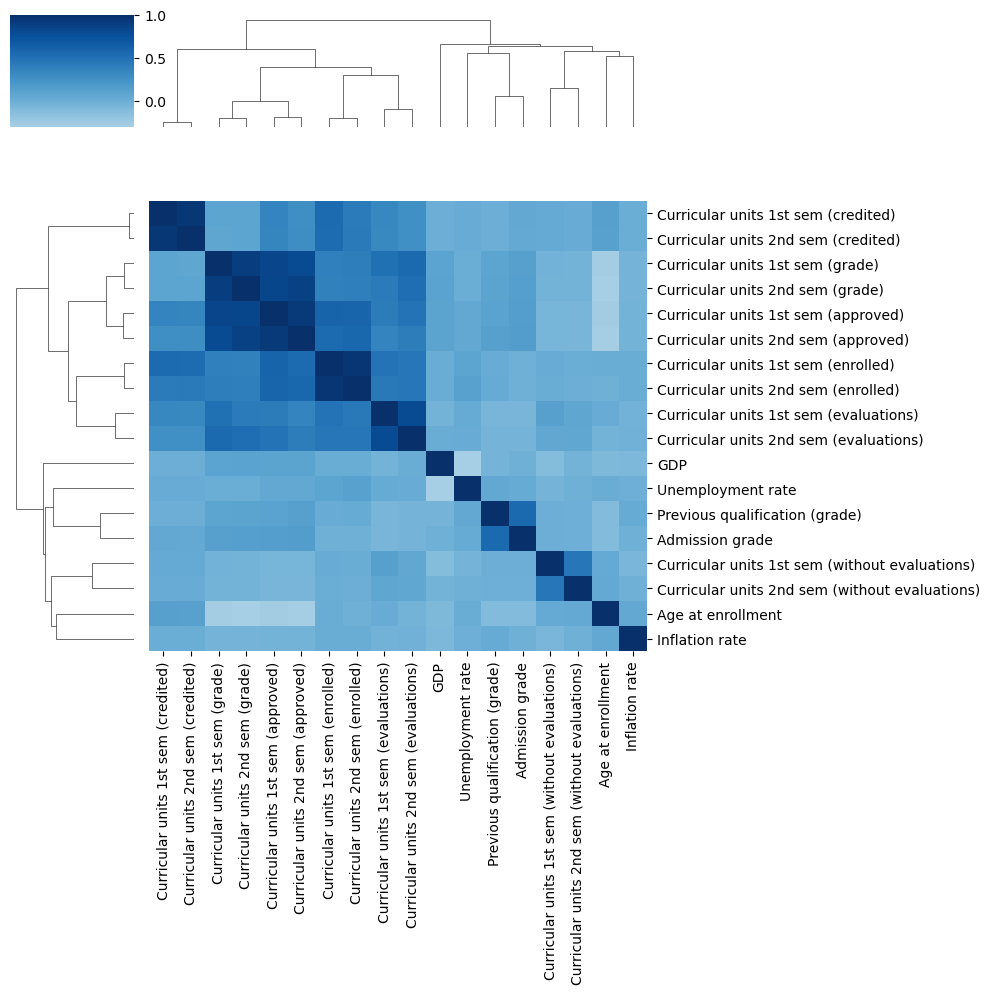

In [13]:
sns.clustermap(df.loc[:, quant].corr(), cmap='Blues', center=0)
plt.tight_layout()
plt.show()

O mais interessante do gráfico acima é a fortíssima correlação entre as variáveis que envolvem o desempenho acadêmico do aluno ao longo do ano, uma propriedade também destacada nos relatórios gerados das variáveis. Segue abaixo as cinco correlações mais significante desse grupo de variáveis.

In [53]:
df.loc[:, quant].corr().apply(abs)[df.loc[:, quant].corr() != 1.0].max().sort_values(ascending=False).iloc[:5]

Curricular units 2nd sem (enrolled)    0.956324
Curricular units 1st sem (enrolled)    0.956324
Curricular units 2nd sem (credited)    0.933899
Curricular units 1st sem (credited)    0.933899
Curricular units 1st sem (approved)    0.922698
dtype: float64

Agora vamos avaliar a correlação das variáveis **quantitativas** com a nossa variável **Target**.

In [58]:
corr_quant_target = pd.concat([df.loc[:, quant], df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})], axis=1).corr().apply(abs)['Target'].sort_values(ascending=False)
corr_quant_target

Target                                            1.000000
Curricular units 2nd sem (approved)               0.458042
Curricular units 1st sem (approved)               0.406236
Curricular units 2nd sem (grade)                  0.291477
Curricular units 1st sem (grade)                  0.272565
Curricular units 2nd sem (enrolled)               0.213233
Curricular units 1st sem (enrolled)               0.188325
Admission grade                                   0.153025
Previous qualification (grade)                    0.152562
Age at enrollment                                 0.131188
Curricular units 1st sem (evaluations)            0.095477
Curricular units 2nd sem (evaluations)            0.084132
Curricular units 2nd sem (without evaluations)    0.068840
GDP                                               0.066924
Unemployment rate                                 0.055488
Curricular units 1st sem (without evaluations)    0.053328
Curricular units 2nd sem (credited)               0.0365

In [59]:
corr_quant_target.mean()

0.19878163712809765

Como é possível visualizar, as variáveis **quantitativas** tem uma correlação considerável com a variável **Target**. Principalmente as variáveis ligadas ao desempenho do aluno no ano acadêmico. Agora vamos visualizar as correlações do segundo grupo de variáveis.

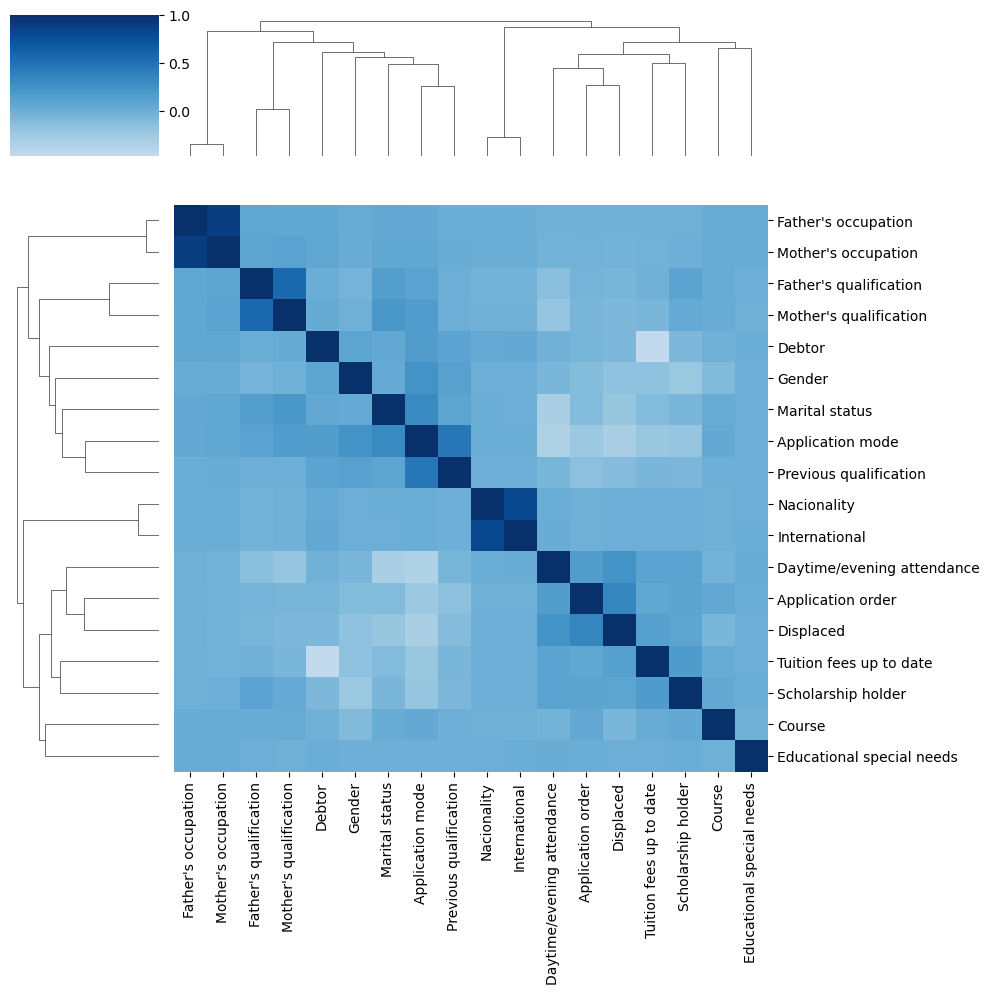

In [38]:
sns.clustermap(df.loc[:, qual].drop('Target', axis=1).corr(), cmap='Blues', center=0)
plt.tight_layout()
plt.show()

Como é possível observar, existe uma fortíssima correlação entre as variáveis **Father's Occupation** e **Mother's Occupation**, assim como outra interessante entre **Mother's Qualification** e **Father's Qualification**. Também temos uma fortísisma correlação entre **Nacionality** e **International**. Diferente do caso das variáveis envolvendo a mãe e o pai do estudante, nesse caso podemos considerar a correlação óbvio, visto que ambas as variáveis tem um alto cruzamente entre a classe 1 (Português) da **Nacionality** e a classe 0 (Aluno não internacional) da **International**. Existe outras correlações menores, porém eles não são tão prevalentes quanto essas duas citadas. Segue uma lista das cinco variáveis com as correlações mais fortes.

In [51]:
df.loc[:, qual].drop('Target', axis=1).corr().apply(abs)[df.loc[:, qual].drop('Target', axis=1).corr() != 1.0].max().sort_values(ascending=False).iloc[:5]

Father's occupation       0.895871
Mother's occupation       0.895871
Nacionality               0.816936
International             0.816936
Mother's qualification    0.567538
dtype: float64

Agora vamos avaliar a correlação das variáveis **qualitativas** com a nossa variável **Target**.

In [56]:
corr_qual_target = pd.concat([df.loc[:, qual].drop('Target', axis=1), df['Target'].map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})], axis=1).corr().apply(abs)['Target'].sort_values(ascending=False)
corr_qual_target

Target                        1.000000
Scholarship holder            0.327609
Gender                        0.212916
Application mode              0.178328
Tuition fees up to date       0.137861
Application order             0.113853
Debtor                        0.102060
Displaced                     0.084538
Previous qualification        0.056640
Daytime/evening attendance    0.048385
Course                        0.048291
Marital status                0.047400
Mother's occupation           0.036394
Father's occupation           0.028467
Mother's qualification        0.020345
Nacionality                   0.003063
International                 0.002007
Educational special needs     0.001608
Father's qualification        0.000080
Name: Target, dtype: float64

In [57]:
corr_qual_target.mean()

0.12893921118948515

Como é possível observar, as variáveis **qualitativas** tem uma correlação menor com a variável **Target**, com apenas a variável **Scholarship holder** tendo uma correlação minimamente considerável. 

### | Agrupando Variáveis por Contexto

Outra forma de agruparmos as nossas variáveis para avaliarmos a correlação das mesmas é agrupando-as com base nos contextos das mesmas, segue abaixo a nossa divisão:

#### Variáveis Demográficas:
- Marital status
- Nationality
- Gender
- Age at enrollment
- Mother's qualification
- Father's qualification
- Mother's occupation
- Father's occupation

#### Variáveis Referente Período Antes da Matrícula:
- Application mode
- Application order
- Previous qualification
- Previous qualification (grade)
- Admission grade

  
#### Variáveis Socioeconômicas:
- Displaced
- Educational special needs
- Debtor
- Tuition fees up to date
- Scholarship holder
- Unemployment rate
- Inflation rate
- GDP

  
#### Variáveis Referente Período Acadêmico:
- Course
- Daytime/evening attendance
- Curricular units 1st sem (credited)
- Curricular units 1st sem (enrolled)
- Curricular units 1st sem (evaluations)
- Curricular units 1st sem (approved)
- Curricular units 1st sem (grade)
- Curricular units 1st sem (without evaluations)
- Curricular units 2nd sem (credited)
- Curricular units 2nd sem (enrolled)
- Curricular units 2nd sem (evaluations)
- Curricular units 2nd sem (approved)
- Curricular units 2nd sem (grade)
- Curricular units 2nd sem (without evaluations)

Agora vamos começar avaliando a correlação das variáveis entre si em cada grupo.

In [60]:
demographs = df[["Marital status", "Nacionality", "Gender",
                "Age at enrollment", "Mother's qualification",
                "Father's qualification", "Mother's occupation",
                "Father's occupation"]].copy()

before_enrollment = df[["Application mode", "Application order",
                        "Previous qualification", "Previous qualification (grade)",
                        "Admission grade"]].copy()

socioeconomics = df[["Displaced", "Educational special needs",
                    "Debtor", "Tuition fees up to date",
                    "Scholarship holder", "Unemployment rate",
                    "Inflation rate", "GDP"]].copy()

academic_period = df[["Course", "Daytime/evening attendance", 
                      "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
                       "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
                       "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
                       "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)", 
                       "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)", 
                       "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)"]].copy()

groups = pd.Series([demographs, before_enrollment, socioeconomics, academic_period ], 
                   index=['demographs', 'before_enrollment', 'socioeconomics', 'academic_period'])

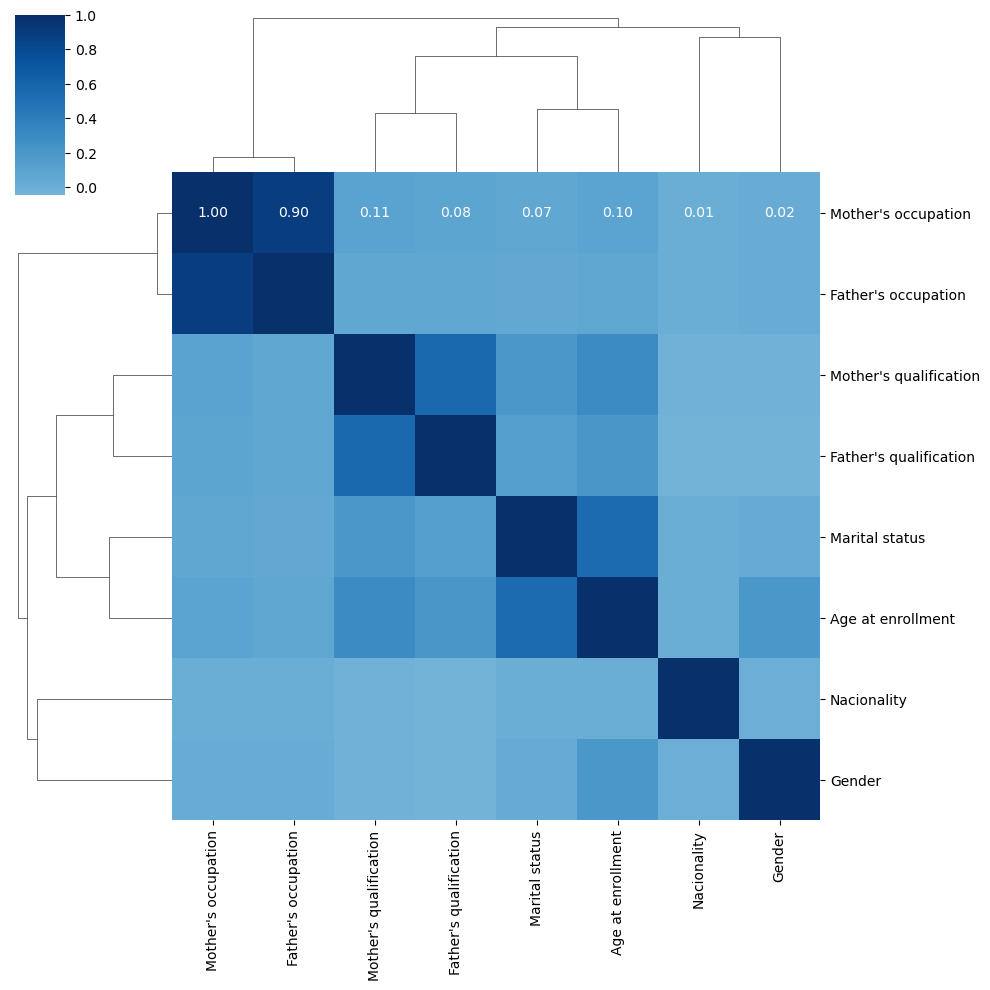

In [61]:
sns.clustermap(demographs.corr(), cmap='Blues', center=0, annot=True, fmt='.2f')
plt.show()

Acima podemos observar a correlação das variáveis demográficas da base de dados, as correlações mais interessantes nesse grupo são as mesmas que vimos anterirmente, com a adicção de **Marital status** e **Age at enrollment**, cuja correlação ficou mais evidente agora.

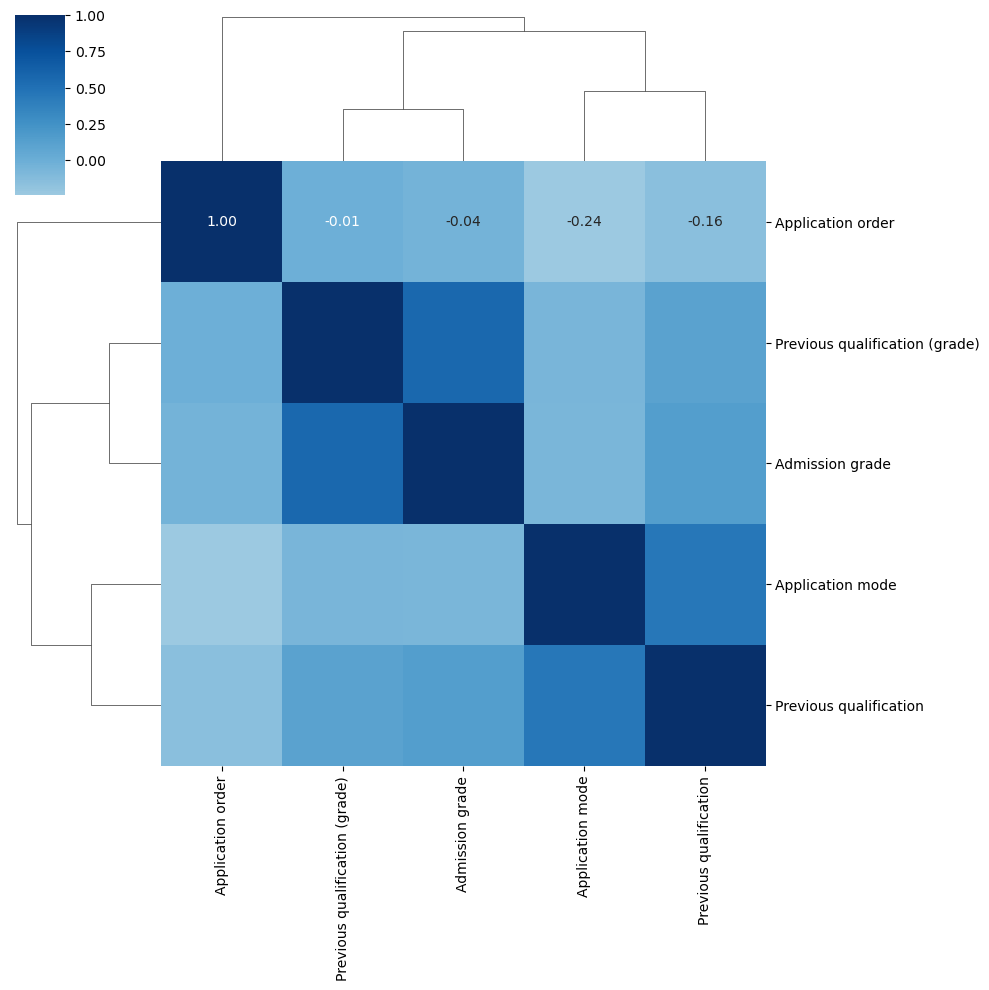

In [62]:
sns.clustermap(before_enrollment.corr(), cmap='Blues', center=0, annot=True, fmt='.2f')
plt.show()

Acima estão as correlações das variáveis pré-matrícula, as correlações mais interessantes são as dos pares de variáveis **Previous qualification (grade)/Admission grade** e **Application mode/Previous qualification**. 

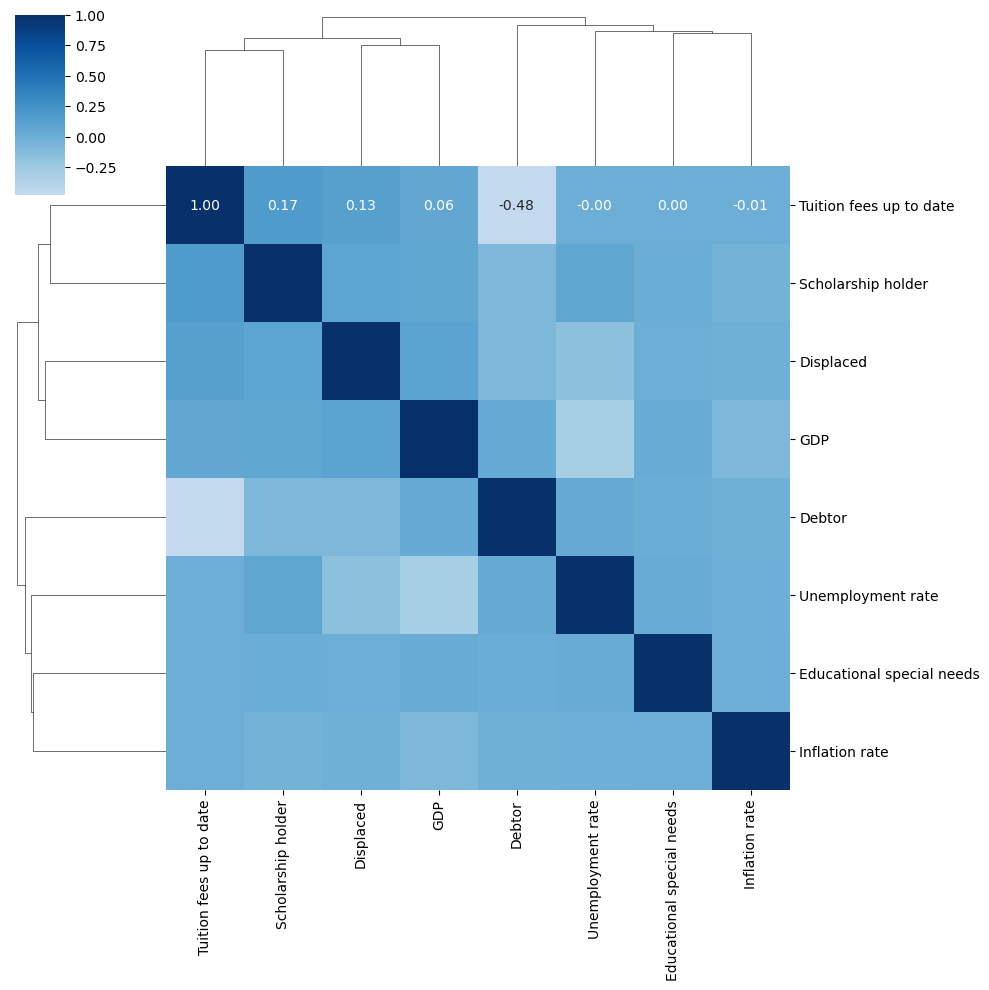

In [63]:
sns.clustermap(socioeconomics.corr(), cmap='Blues', center=0, annot=True, fmt='.2f')
plt.show()

Acima o grupo de variáveis socieconômicas, a única correlação interessante é a correlação negativa entre **Debtor** e **Tuition fees up to date**.

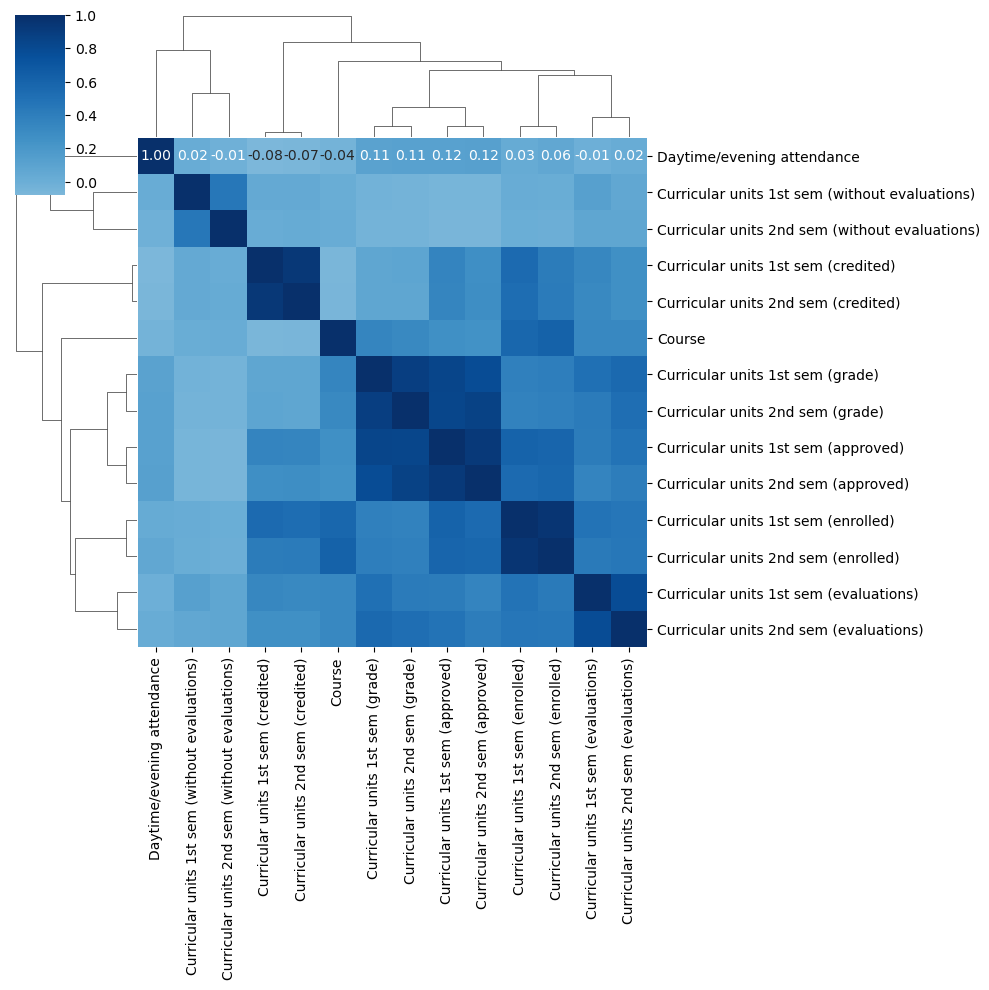

In [64]:
sns.clustermap(academic_period.corr(), cmap='Blues', center=0, annot=True, fmt='.2f')
plt.show()

Por fim, acima temos o agrupamento mais interessante, assim como observamos anteriormente, as variáveis a respeito do desempenho acadêmico do aluno ao longo do ano tem a mais forte correlação.

Abaixo vamos levantar todas as correlações mais relevantes dentro dos grupos

In [65]:
# Encontrar correlações mais relevantes
corr_per_group = [] 
    
for group in groups:
    corr = group.corr().unstack().reset_index()
    corr.columns = ['Var A', 'Var B', 'Correlacao Linear']
    corr = (corr
            .query('`Var A` < `Var B`')
            .sort_values(by='Correlacao Linear', ascending=False)
            .reset_index(drop=True)
            .assign(Tipo = 'Positiva'))
    
    corr.loc[corr['Correlacao Linear'] < 0, 'Tipo'] = 'Negativa'
    corr['Correlacao Linear'] = abs(corr['Correlacao Linear'])
    
    corr_per_group.append(corr[corr['Correlacao Linear'] > 0.65])

In [66]:
# Variáveis Demográficas
corr_per_group[0]

,Var A,Var B,Correlacao Linear,Tipo
0,Father's occupation,Mother's occupation,0.895871,Positiva


In [67]:
# Variáveis Pré-matrícula
corr_per_group[1]

,Var A,Var B,Correlacao Linear,Tipo


In [68]:
# Variáveis Socioeconômicas
corr_per_group[2]

,Var A,Var B,Correlacao Linear,Tipo


In [69]:
# Variáveis Referent Desempenho Acadêmico no 1º Ano
corr_per_group[3]

,Var A,Var B,Correlacao Linear,Tipo
0,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.956324,Positiva
1,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),0.933899,Positiva
2,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.922698,Positiva
3,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.889460,Positiva
4,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),0.859389,Positiva
5,Curricular units 1st sem (approved),Curricular units 1st sem (grade),0.839857,Positiva
6,Curricular units 1st sem (approved),Curricular units 2nd sem (grade),0.830464,Positiva
7,Curricular units 1st sem (grade),Curricular units 2nd sem (approved),0.787610,Positiva
8,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.786844,Positiva


Como podemos observar, os únicos grupos de variáveis com correlações relevantes são as **Demógráficas** e de **Desempenho Acadêmico**, com esse revelando uma forte correlação entre o desempenho do aluno no 1º semestre ao 2º.

#### | Visualizando a Correlação entre Grupos de Variáveis

Para que seja possível visualizarmos as correlações entre os grupos das variavéis, vamos utilizar da **Análise de Correspondência Múltipla (MCA)** para reduzir o número de variáveis categóricas de cada grupo em apenas uma única projeção. Essa etapa poderia facilmente ser ignorada, mas com o intuito de esclarecer uma possível ligação entre grupos, vamos prosseguir, tendo em mente que a perca de variablidade deve afetar o resultado final.

Mas para começarmos a redução, é necessário ajustar algumas variáveis e garantir que todas as variáveis são categóricas. Por isso iremos transformar as variáveix contínuas em categóricas.

Começando com a variável **Age at enrollment**, dividindo os alunos em faixas etárias distintas.

In [74]:
# Transformar variável 'age at enrollment' de variável contínua para categórica
demographs['cat_Age at enrollment'] = pd.qcut(demographs['Age at enrollment'], q=4, labels=[1, 2, 3, 4])
demographs.drop('Age at enrollment', axis=1, inplace=True)
demographs.head(5)

KeyError: 'Age at enrollment'

Seguindo com as variáveis **Previous qualification (grade)** e **Admission grade**.

In [75]:
# Transformar variáveis 'Previous qualification (grade)' e 'Admission grade' de variável contínua para categórica
before_enrollment['cat_Previous qualification (grade)'] = pd.qcut(before_enrollment['Previous qualification (grade)'], q=4, labels=[1, 2, 3, 4])
before_enrollment['cat_Admission grade'] = pd.qcut(before_enrollment['Admission grade'], q=4, labels=[1, 2, 3, 4])

before_enrollment.drop(['Previous qualification (grade)', 'Admission grade'], axis=1, inplace=True)

before_enrollment.head(5)

,Application mode,Application order,Previous qualification,cat_Previous qualification (grade),cat_Admission grade
0,1,1,1,2,2
1,17,1,1,1,2
2,17,2,1,3,4
3,1,3,1,2,3
4,1,2,1,2,2


Agora com as variáveis **Unemployment rate**, **Inflation rate** e **GDP**.

In [76]:
socioeconomics['cat_Unemployment rate'] = pd.qcut(socioeconomics['Unemployment rate'], q=4, labels=[1, 2, 3, 4])
socioeconomics['cat_Inflation rate'] = pd.qcut(socioeconomics['Inflation rate'], q=4, labels=[1, 2, 3, 4])
socioeconomics['cat_GDP'] = pd.qcut(socioeconomics['GDP'], q=4, labels=[1, 2, 3, 4])

socioeconomics.drop(['Unemployment rate', 'Inflation rate', 'GDP'], axis=1, inplace=True)

socioeconomics.head(5)

,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,cat_Unemployment rate,cat_Inflation rate,cat_GDP
0,0,0,0,1,1,2,2,4
1,1,0,0,1,0,2,2,4
2,0,0,0,1,0,4,1,2
3,1,0,0,1,1,2,2,4
4,1,0,0,1,0,1,3,2


POr fim as variáveis **Curricular units 1st sem (grade)** e **Curricular units 2nd sem (grade)**.

In [77]:
academic_period[f'cat_Curricular units 1st sem (grade)'] = pd.qcut(academic_period['Curricular units 1st sem (grade)'], q=4, labels=[1, 2, 3, 4])
academic_period[f'cat_Curricular units 2nd sem (grade)'] = pd.qcut(academic_period['Curricular units 2nd sem (grade)'], q=4, labels=[1, 2, 3, 4])

academic_period.drop(['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'], axis=1, inplace=True)

academic_period.head(5)

,Course,Daytime/evening attendance,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations),cat_Curricular units 1st sem (grade),cat_Curricular units 2nd sem (grade)
0,9238,1,0,6,6,6,0,0,6,7,6,0,4,3
1,9238,1,0,6,8,4,0,0,6,9,0,0,2,1
2,9254,1,0,6,0,0,0,0,6,0,0,0,1,1
3,9500,1,0,7,9,7,0,0,8,11,7,0,3,3
4,9500,1,0,7,12,6,0,0,7,12,6,0,3,3


Agora com isso feito, vamos transformar nossos grupos.

In [78]:
from prince import MCA 

# Usando one-hot encoding para preparar os dados
demographs_encoded = pd.get_dummies(demographs, dtype='int')

# Criando objeto MCA
dem_mca = MCA(n_components=1, random_state=412, one_hot=False)

# Transformando a base de dados
dem_mca.fit_transform(demographs_encoded)

# Visualizando a variabilidade da componente
dem_mca.eigenvalues_summary['% of variance']

component
0    39.61%
Name: % of variance, dtype: object

In [84]:
# Usando one-hot encoding para preparar os dados
benroll_encoded = pd.get_dummies(before_enrollment, dtype='int')

# Criando objeto MCA
ber_mca = MCA(n_components=1, random_state=412, one_hot=False)

# Transformando a base de dado
ber_mca.fit_transform(benroll_encoded)

# Visualizando a variabilidade da componente
ber_mca.eigenvalues_summary['% of variance']

component
0    25.71%
Name: % of variance, dtype: object

In [83]:
# Usando one-hot encoding para preparar os dados
socioeconomics_encoded = pd.get_dummies(socioeconomics, dtype='int')

# Criando objeto MCA
sce_mca = MCA(n_components=1, random_state=412, one_hot=False)

# Transformando a base de dado
sce_mca.fit_transform(socioeconomics_encoded)

# Visualizando a variabilidade da componente
sce_mca.eigenvalues_summary['% of variance']

component
0    21.08%
Name: % of variance, dtype: object

In [82]:
# Usando one-hot encoding para preparar os dados
academic_period_encoded = pd.get_dummies(academic_period, dtype='int')

# Criando objeto MCA
acp_mca = MCA(n_components=1, random_state=412, one_hot=False)

# Transformando a base de dado
acp_mca.fit_transform(academic_period_encoded)

# Visualizando a variabilidade da componente
acp_mca.eigenvalues_summary['% of variance']

component
0    66.37%
Name: % of variance, dtype: object

Como é possível observar, perdamos uma quantidade grande de variabilidade entre a redução de dimensões das bases de dados, vamos visualizar agora as correlações dos grupos.

In [85]:
d = pd.DataFrame()
d['Demographs'] = dem_mca.row_coordinates(demographs_encoded)[0]
d['Before Enrollment'] = ber_mca.row_coordinates(benroll_encoded)[0]
d['Socioeconomics'] = sce_mca.row_coordinates(socioeconomics_encoded)[0]
d['After Enrollment'] = acp_mca.row_coordinates(academic_period_encoded)[0]

correlation_matrix = d.corr()
correlation_matrix

,Demographs,Before Enrollment,Socioeconomics,After Enrollment
Demographs,1.000000,0.070842,0.108278,0.013756
Before Enrollment,0.070842,1.000000,0.060217,-0.003611
Socioeconomics,0.108278,0.060217,1.000000,0.025077
After Enrollment,0.013756,-0.003611,0.025077,1.000000


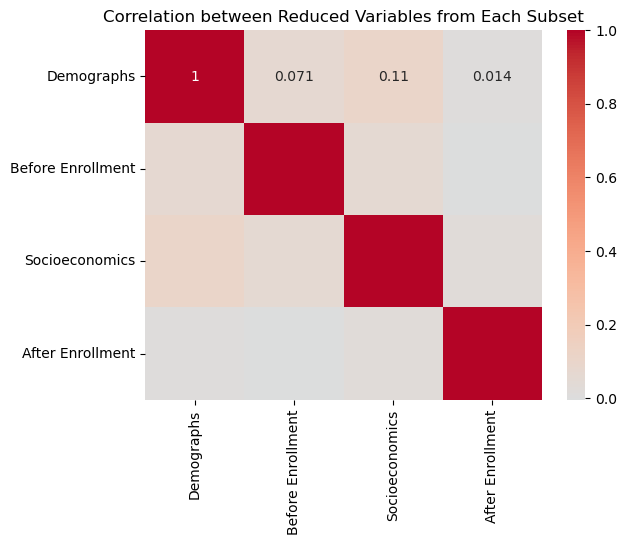

In [86]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Reduced Variables from Each Subset')
plt.show()

Levando em consideração que perdemos uma quantidade considerável de **variabilidade** ao reduzirmos a dimensionalidade de cada grupo de variávies, o resultado final indica que não existem fortes correlações entre os grupos, contudo isso não deve ser levado como uma verdade absoluta. Portanto, vamos analizar a correlações das variáveis entre grupos.

# Continuar aqui

In [31]:
corr_inter_groups = []

for group in groups:
    for i in range(len(groups)):
        if group.columns[0] == groups.loc[groups.index[i]].columns[0]:
            continue
        else:
            corr_long = pd.concat([group, groups.loc[groups.index[i]]], axis=1).corr().stack().reset_index()
            corr_long.columns = ['Var1', 'Var2', 'Correlation']
            corr_long = corr_long[corr_long['Var1'] != corr_long['Var2']]
            corr_long = corr_long.drop_duplicates(subset=['Correlation'])
            corr_long = corr_long.reindex(corr_long['Correlation'].abs().sort_values(ascending=False).index)
            corr_inter_groups.append(corr_long)

In [32]:
for i in range(len(corr_inter_groups)):
    print('='*100)
    print(corr_inter_groups[i].iloc[:5])

                                   Var1                    Var2  Correlation
71                  Mother's occupation     Father's occupation     0.895871
99                cat_Age at enrollment        Application mode     0.631599
155  cat_Previous qualification (grade)     cat_Admission grade     0.609976
43               Mother's qualification  Father's qualification     0.567538
114                    Application mode  Previous qualification     0.451152
                       Var1                     Var2  Correlation
86      Mother's occupation      Father's occupation     0.895871
52   Mother's qualification   Father's qualification     0.567538
171                  Debtor  Tuition fees up to date    -0.475647
120   cat_Age at enrollment                Displaced    -0.360661
7            Marital status    cat_Age at enrollment     0.335879
                                    Var1  \
258  Curricular units 1st sem (enrolled)   
235  Curricular units 1st sem (credited)   
304  Curri

# To do list

- Melhorar visualização da comparação entre grupos
- Interpretar resultados
- Avaliar a Correlação das Variáveis de Cada Grupo referente ao Target
- Avaliar a Correlação do Grupo referente ao Target
- Avaliar a Entropia das variáveis
- Avaliar a Variabilidade das Variáveis
